# Gradient descent

In this exercice we will make a linear fit to simulated data using the (stochastic) gradient descent method.

In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize # for fits
%matplotlib inline

## Generate training dataset

a) First Generate N=100 observations of 1-D feature x and target values t, where:
* x is evenly spaced between 0 and 1 (use `np.linspace` function)
* t follows a linear function $f(x)$ plus some random gaussian noise $\epsilon$: $$t_i = f(x_i) + \epsilon = a \cdot x_i + b + \epsilon,$$ with a=2 and b=5, and $\epsilon$ is distributed along the normal distribution `np.random.normal(0,0.1,N)`




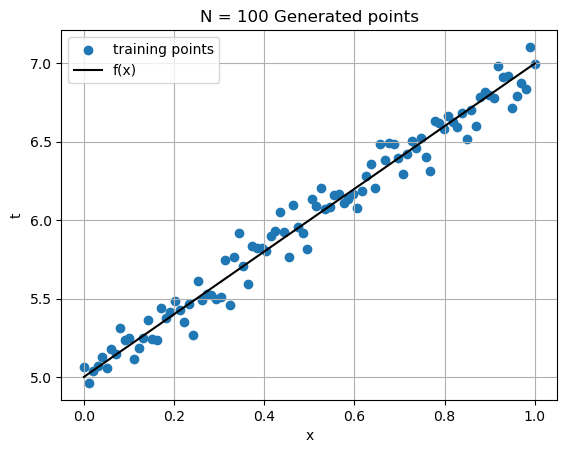

In [21]:
# Generating training data set

N = 100 # number of observations 
def f(x,a,b): 
    # linear function 
    return a*x + b   


#Parameters

x = np.linspace(0,1,N)
epsilon = np.random.normal(0,0.1,N)
a = 2
b = 5


# Observations

t = f(x,a,b) + epsilon


# Plot the values of the N data points x,t and f(x).

#plt.subplots(figsize=(12,8))
plt.title(f"N = {N} Generated points")
plt.scatter(x,t, label = "training points")
plt.xlabel("x")
plt.ylabel("t")
plt.plot(x, f(x,a,b), "k", label = "f(x)")
plt.legend(loc='best')
plt.grid()
plt.savefig("generated_training_dataset.png", dpi = 300)



### Cost function and gradients

To determine the weights $a$ and $b$ of $f(x)$ we'll use the Mean Square Error cost function:
$$E(a,b) = \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) ^2.$$

The derivatives of the cost function with respect to the parameters $a$ and $b$ are: 

\begin{eqnarray}
\begin{cases}
\frac{\partial E(a,b)}{\partial a} = -2 \frac{1}{N} \sum_{i=1}^N x_i \left(t_i - y(x_i) \right) \\\\
\frac{\partial E(a,b)}{\partial b} = -2 \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) 
\end{cases}
\end{eqnarray}


In [22]:
# function that return the MSE

def E(a,b,t,x):
    E = np.power(t-f(x,a,b), 2).sum()
    E = E/len(x)
    return E


# Function that update weights

def update_weights(a, b, x, t, learning_rate):
    '''
    Function that calculate the partial derivatives 
    of the cost functionand that updates the weights 
    $a$ and $b$ for a given learning_rate
    Retur a,b
    '''
    
    a_deriv = 0
    b_deriv = 0
    # calculate derivatives
    a_deriv = (-2*x * ( t - f(x,a,b) )).sum()
    b_deriv = (-2* (t - f(x,a,b)) ).sum()
    N = len(x)

    # update weights
    a -= (a_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate
    return a,b

## Performing training

Starting from initial values $a=1$, $b=1$, apply the gradient descent method `nsteps=1000` times, with `learning_rate=0.05`.


The value of weights at final step are: a = 1.971, b = 5.016


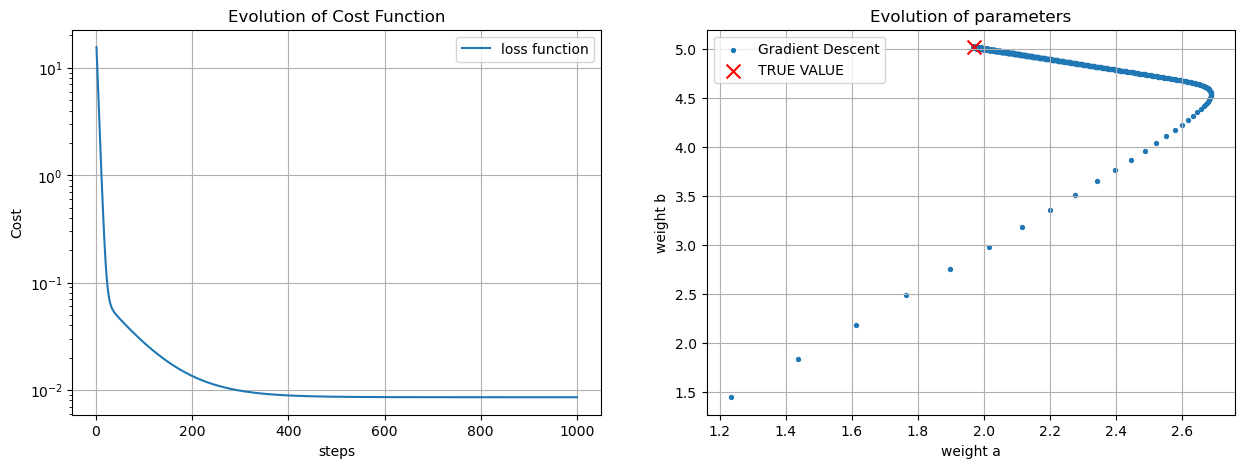

In [23]:
# Parameters

a_train = 1
b_train = 1
nsteps = 1000
learning_rate= 0.05


# Cost function empty arrays to track evolution 

loss_function = []
va = [] # vectors of weights a,b
vb = [] # vectors of weights a,b


# calculate cost function at each step

for i in range(0,nsteps):
    a_train,b_train = update_weights(a_train, b_train, x, t, learning_rate)
    va.append(a_train)
    vb.append(b_train)
    loss_function.append(E(a_train,b_train,t,x))
print(f"The value of weights at final step are: a = {a_train:.3f}, b = {b_train:.3f}")


# Plot the evolution of Cost function

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.title("Evolution of Cost Function")
plt.plot(np.linspace(1,nsteps, nsteps), loss_function, label = "loss function")
plt.xlabel("steps")
plt.ylabel("Cost")
plt.yscale('log')
plt.legend()
plt.grid()


# Plot the evolution of weights (a,b)

plt.subplot(1,2,2)
plt.title("Evolution of parameters")
plt.scatter(va,vb, s = 8, label = "Gradient Descent")
plt.scatter(a_train, b_train, s = 100, c =  "r", marker = "x", label = "TRUE VALUE")
plt.xlabel("weight a")
plt.ylabel("weight b")
plt.legend()
plt.grid()

plt.savefig("evolution_cost_and_parameters.png", dpi = 300)

## Stochastic gradient descent

Perform gradient descent on batch of 10 events instead of total number of events $N$. This is called ${\it stochastic}$ gradient descent.

The value of the weights are: a = 2.035, b = 4.985


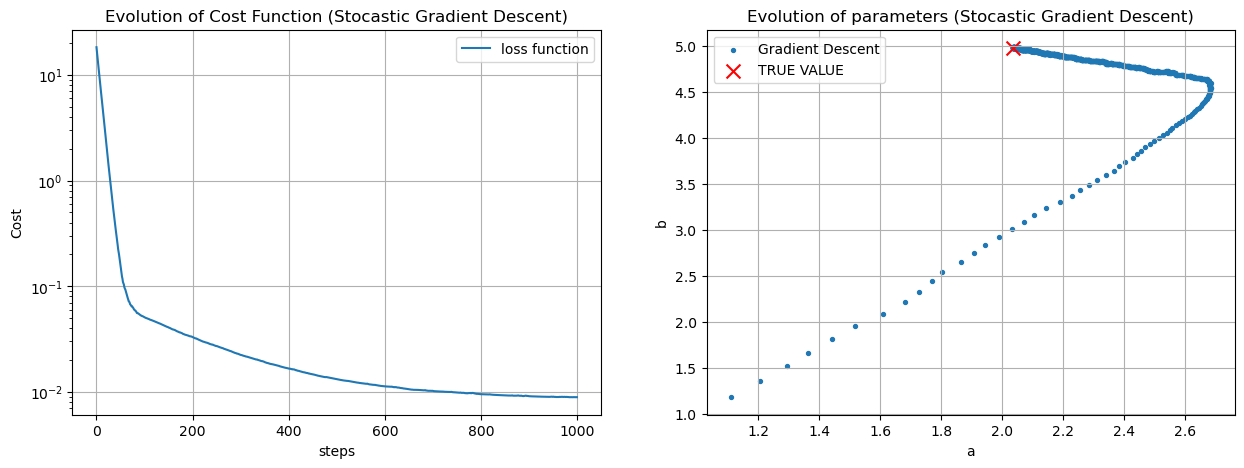

In [24]:
# Parameters

nsteps=1000
a_train=1 # initial value for a
b_train=1 # initial value for b
learning_rate = 0.02
batch_size= 10 # batch size


# First pair x,t values

x1 = x[:,np.newaxis] # Transform vector into column of dim (100,1)
t1 = t[:,np.newaxis] # Transform vector into column of dim (100,1)
points = np.concatenate((x1,t1),axis=1) # Concatenate two vectors in table of dim (100,2)


# Training

va=[]
vb=[]
loss_function=[]
for i in range(0,nsteps):
    np.random.shuffle(points)   # Shuffle values
    XX = points[:batch_size,0]  # x feature
    YY = points[:batch_size,1]  # target value
    a_train,b_train = update_weights(a_train, b_train, XX, YY, learning_rate)
    va.append(a_train)
    vb.append(b_train)
    loss_function.append(E(a_train,b_train,t,x))
print(f"The value of the weights are: a = {a_train:.3f}, b = {b_train:.3f}")


# Plot the evolution of Cost function
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.title("Evolution of Cost Function (Stocastic Gradient Descent)")
plt.plot(range(nsteps), loss_function, label = "loss function")
plt.xlabel("steps")
plt.ylabel("Cost")
plt.yscale('log')
plt.legend()
plt.grid()


# Plot the evolution of weights (a,b)
plt.subplot(1,2,2)
plt.title("Evolution of parameters (Stocastic Gradient Descent)")
plt.scatter(va,vb, s = 8, label = "Gradient Descent")
plt.scatter(a_train, b_train, s = 100, c =  "r", marker = "x", label = "TRUE VALUE")
plt.xlabel("a")
plt.ylabel("b")
plt.legend()
plt.grid()


plt.savefig("evolution_cost_and_parameters_stocastic.png", dpi = 300)

### Fit data with a polynomial function



In [25]:
# Fit data with polynomial function

M=1 # dimension of polynomial
par,residuals, rank, singular_values, rcond = np.polyfit(x, t, M,full=True) # Use np.polyfit function. 
pol = np.poly1d(par)

a_fit=par[0]
b_fit=par[1]


# Check that the fitted parameters are compatible with the true parameters $a$ and $b$.

print('Fitted parameters of polinomial: a=%.3f b=%.3f' % (a_fit, b_fit))
print(f"Parameters from Stocastic Gradient Descent: a = {a_train:.3f}, b = {b_train:.3f}")

Fitted parameters of polinomial: a=1.970 b=5.017
Parameters from Stocastic Gradient Descent: a = 2.035, b = 4.985
